In [1]:
#之前的两章，设定权重的工作是由人工进行的。而神经网络，它可以自动地从数据中学习到合适的权重参数
#输入层，输出层，中间层（隐藏层）

In [2]:
#感知机：y=h(b+w1x1+w2x2),h(x)={0(x<=0);1(x>0)}
#激活函数：将输入信号的总和转换为输出信号
#朴素感知机：单层网络。激活函数使用了阶跃函数
#多层感知机：神经网络。激活函数使用了sigmoid

In [4]:
#激活函数：进行信号的转换
#阶跃函数：以阈值为界，一旦输入超过阈值，就切换输出
#sigmoid函数： 1/(1+exp(-x))
#共通点：输入小，输出接近0，输入大，输出向1靠近。输入信号为重要信息，输出比较大的值。输出信号的值在0到1之间

In [5]:
#阶跃函数
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
#但是参数只能接受实数，如果参数是Numpy数组
def step_function(x):
    y=x>0
    return y.astype(np.int)

In [6]:
import numpy as np
x=np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [7]:
y=x>0
y

array([False,  True,  True])

In [8]:
y=y.astype(np.int)#astype()方法转换Numpy数组的类型
y

array([0, 1, 1])

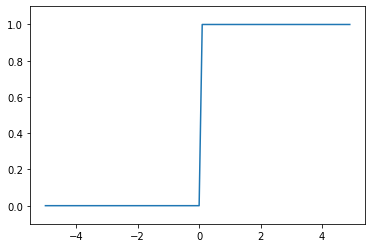

In [9]:
#绘制阶跃函数
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x>0,dtype=np.int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)#制定y轴范围
plt.show()

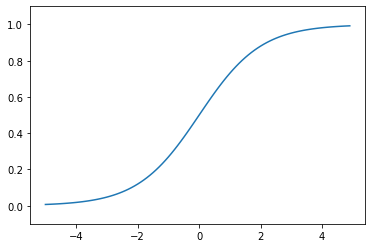

In [10]:
#sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [11]:
#神经网络的激活函数必须使用非线性函数，否则隐藏层（加深神经网络的层数）没有意义。
#因为：y=h(h(h(x))),h(x)=cx,则y=c*c*c*x,即y=ax(a=c*c*c)
#激活函数：ReLU
#ReLU:h(x)={x(x>0);0(x<=0)}
import numpy as np
def relu(x):
    return np.maximum(0,x)

In [12]:
#多维数组
A=np.array([1,2,3,4])
np.ndim(A)#数组的维数,一维数组

1

In [13]:
A.shape

(4,)

In [14]:
A.shape[0]#第0轴

4

In [15]:
B=np.array([[1,2],[3,4],[5,6]])
np.ndim(B)#二维数组3*2

2

In [16]:
B.shape

(3, 2)

In [17]:
B.shape[0]

3

In [18]:
#矩阵乘法
A=np.array([[1,2],[3,4]])
B=np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [20]:
#神经网络内积
#A*B=C
#X*W=Y  X:2 W:2*3 Y:3
#x=(x1 x2) w=(w11 w21 w31;w12,w22,w32)
x=np.array([1,2])
w=np.array([[1,3,5],[2,4,6]])
y=np.dot(x,w)
print(y)

[ 5 11 17]


In [21]:
#恒等函数：将输入照原样输出,其实就是全连接的意思
def identity_function(x):
    return x

In [23]:
def init_network():
    network={}
    network["W1"]=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])#2*3，两个输入，三个输出
    network["b1"]=np.array([0.1,0.2,0.3])
    network["W2"]=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])#3*2，三个输入，两个输出
    network["b2"]=np.array([0.1,0.2])
    network["W3"]=np.array([[0.1,0.3],[0.2,0.4]])#2*2，两个输入，两个输出
    network["b3"]=np.array([0.1,0.2])
    return network
def forward(network,x):
    W1,W2,W3=network["W1"],network["W2"],network["W3"]
    b1,b2,b3=network["b1"],network["b2"],network["b3"]
    
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=identity_function(a3)
    return y
network=init_network()
x=np.array([1.0,0.5])
y=forward(network,x)
print(y)

[0.31682708 0.69627909]


In [24]:
#输出层设计
#机器学习：回归问题和分类问题
#回归问题（根据某个输入预测一个数值）用恒等函数
#分类问题（属于哪一个类别）用softmax函数

In [25]:
#softmax:输出是0-1之间的实数，输出值总和为1，把softmax函数的输出解释为“概率”；使用softmax各元素大小关系不会改变，因为exp是单调递增函数
#y(k)=exp(ak)/exp(ai)(i=1-n，且ai的求和)
def softmax(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y
#问题：exp(1000)会返回无穷大的数，输出nan，叫做溢出
#解决：减去输入信号的最大值
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)#溢出对策
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

a=np.array([0.3,2.9,4.0])
y=softmax(a)
print(y)#y[0]概率0.018（1.8%），y[1]概率0.245,y[2]概率0.737,因为第2个元素概率最高，所以答案是第2个类别
    


[0.01821127 0.24519181 0.73659691]


In [26]:
#神经网络只把输出值最大的神经元所对应的类别作为识别结果

In [27]:
#求解机器学习问题的步骤分为“学习”“推理”
#学习：在学习阶段进行模型的学习
#推理：用学到的模型对未知数据进行推理（分类）
#对于分类问题，输出层的神经元的数量一般设定为类别的数量

#使用神经网络解决问题时：
#首先使用训练数据（学习数据）进行权重参数的学习
#进行推理时，用刚才学习到的参数，对输入数据进行分类

In [28]:
#前面介绍了神经网络的结构
#现在，假设学习已经全部结束，我们使用学习到的参数，先实现神经网络的“推理处理”，这个推理处理也叫作神经网络的前向传播
#手写数字识别
#MNIST手写数字图像集（使用方法：先用训练图像进行学习，再用学习到的模型度量能在多大程度上对测试图像进行正确的分类），28*28灰度图像(1通道)
import sys
sys.path

['C:\\Users\\Lenovo',
 'E:\\ProgramData\\Anaconda3\\python38.zip',
 'E:\\ProgramData\\Anaconda3\\DLLs',
 'E:\\ProgramData\\Anaconda3\\lib',
 'E:\\ProgramData\\Anaconda3',
 '',
 'E:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'E:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'E:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'E:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'E:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'E:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Lenovo\\.ipython']

In [30]:
import os
os.pardir

'..'

In [31]:
#load_mnist函数：（训练图像，训练标签），（测试图像，测试标签）
#load_mnist(normalize=True,flatten=True,one_hot_label=False)
#normalize:是否将输入图像正规化为0.0-1.0的值。False：输入图像像素为0-255
#flatten:是否展开图像（变为一维数组）。False:1*28*28;True:784
#one_hot_label.True:正确解标签为1其余为0；False:7,2这样保存正确解标签

In [32]:
os.getcwd()

'C:\\Users\\Lenovo'

In [34]:
sys.path.append(os.getcwd())
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train,t_train),(x_test,t_test)=load_mnist(flatten=True,normalize=False)#读入是一维(一列)Numpy数组
img=x_train[0]
label=t_train[0]
print(label)


5


In [35]:
print(img.shape)
img=img.reshape(28,28)#指定期望形状
print(img.shape)

(784,)
(28, 28)


In [36]:
img_show(img)#显示的时候，要变为原来的28*28像素的图像，所以之前reshape

In [37]:
#神经网络推理处理
#输入层有784个神经元（28*28）,输出层有10个神经元（10类别分类，0-9）
#两个隐藏层，第一个有50个神经元，第二个有100个神经元
import pickle
def get_data():
    (x_train,t_train),(x_test,t_test)=load_mnist(flatten=True,normalize=True,one_hot_label=False)#normalize=True正规化
    return x_test,t_test
def init_network():
    with open("E:\BaiduNetdiskDownload\医疗AI\大作业\深度学习入门\【源代码】深度学习入门：基于Python的理论与实现\ch03\sample_weight.pkl","rb") as f:
        network=pickle.load(f)#sample_weight.pkl放的权重参数
    return network

def predict(network,x):#进行分类
    W1,W2,W3=network["W1"],network["W2"],network["W3"]#三层神经网络
    b1,b2,b3=network["b1"],network["b2"],network["b3"]
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=softmax(a3)#输出概率值[0.1,0.3,...],0的概率为0.1
    return y


In [38]:
x,t=get_data()
network=init_network()

accuracy_cnt=0
for i in range(len(x)):
    y=predict(network,x[i])#输入一个图像，784个神经元
    p=np.argmax(y)#输出十个概率值，取最大的
    if p==t[i]:#比较神经网络预测答案与正确解标签，回答正确的概率作为识别精度
        accuracy_cnt+=1
print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [39]:
x.shape#10000张输入图像，每个图像784

(10000, 784)

In [40]:
x.shape[0]

10000

In [41]:
x[0].shape#axis=0

(784,)

In [43]:
 W1,W2,W3=network["W1"],network["W2"],network["W3"]#三层神经网络
W1.shape#784输入，50输出

(784, 50)

In [44]:
W2.shape#50输入，100输出

(50, 100)

In [45]:
W3.shape#100输入，10输出

(100, 10)

In [47]:
#批处理
#想用predict()一次打包处理100张图片，则输入x为100*784
x,t=get_data()
network=init_network()
batch_size=100#

accuracy_cnt=0

for i in range(0,len(x),batch_size):
    x_batch=x[i:i+batch_size]
    y_batch=predict(network,x_batch)
    p=np.argmax(y_batch,axis=1)
    accuracy_cnt+=np.sum(p==t[i:i+batch_size])
print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [49]:
#理解
#range
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [56]:
list(range(0,10,3))

[0, 3, 6, 9]

In [57]:
#argmax
x=np.array([[0.8,0.1,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
y=np.argmax(x,axis=1)
print(y)

[0 2 1 0]


In [58]:
#数组比较
y=np.array([1,2,1,0])
t=np.array([1,2,0,0])
print(y==t)

[ True  True False  True]


In [59]:
#累积true
np.sum(y==t)

3